In [112]:
!pip install opencv-python

<h3>import libraries</h3>

In [113]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [114]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [115]:
def load_data():
    datasets = ['/Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/input/seg_train', 
                '/Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/input/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [119]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/input/seg_train


100%|██████████████████████████████████████| 2274/2274 [00:03<00:00, 630.43it/s]


Loading /Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/input/seg_test


100%|████████████████████████████████████████| 510/510 [00:00<00:00, 700.60it/s]


In [120]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [121]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


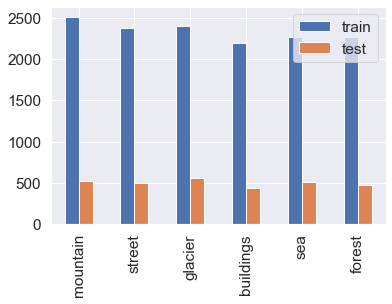

In [122]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

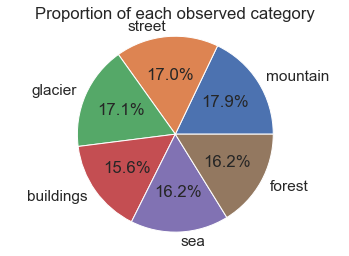

In [123]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [124]:
# Good practice: scale the data
train_images = train_images / 255.0 
test_images = test_images / 255.0
# Visualize the data
# We can display a random image from the training set.

In [125]:
def display_random_image(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

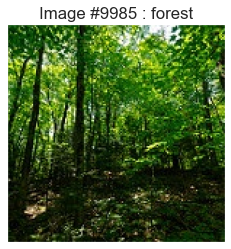

In [126]:
display_random_image(class_names, train_images, train_labels)

In [127]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

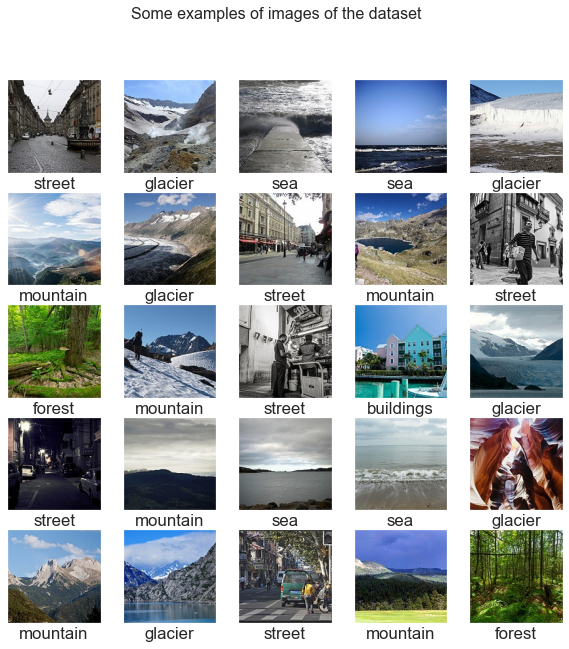

In [128]:
display_examples(class_names, train_images, train_labels)

In [129]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [130]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [131]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 121s 1s/step - loss: 1.1868 - accuracy: 0.5539 - val_loss: 0.8802 - val_accuracy: 0.6612
Epoch 2/20
88/88 [==============================] - 110s 1s/step - loss: 0.7526 - accuracy: 0.7258 - val_loss: 0.7169 - val_accuracy: 0.7406
Epoch 3/20
88/88 [==============================] - 108s 1s/step - loss: 0.5799 - accuracy: 0.7967 - val_loss: 0.6495 - val_accuracy: 0.7620
Epoch 4/20
88/88 [==============================] - 118s 1s/step - loss: 0.4879 - accuracy: 0.8227 - val_loss: 0.6972 - val_accuracy: 0.7435
Epoch 5/20
88/88 [==============================] - 112s 1s/step - loss: 0.3584 - accuracy: 0.8758 - val_loss: 0.6966 - val_accuracy: 0.7613
Epoch 6/20
88/88 [==============================] - 110s 1s/step - loss: 0.2619 - accuracy: 0.9128 - val_loss: 0.7620 - val_accuracy: 0.7592
Epoch 7/20
88/88 [==============================] - 111s 1s/step - loss: 0.1685 - accuracy: 0.9514 - val_loss: 0.7812 - val_accuracy: 0.7791
Epoch 8/20
88

In [132]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))
    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_accuracy vs val_accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

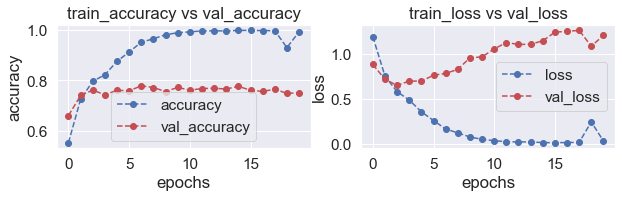

In [133]:
plot_accuracy_loss(history)

In [134]:
test_loss = model.evaluate(test_images, test_labels)

94/94 [==============================] - 8s 78ms/step - loss: 1.2360 - accuracy: 0.7530


In [135]:
model.save('/Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/models/correctImageClassifier')

INFO:tensorflow:Assets written to: /Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/models/correctImageClassifier/assets


INFO:tensorflow:Assets written to: /Users/ritgirdh/Desktop/codebase/study/CNN-image-classification/models/correctImageClassifier/assets


94/94 [==============================] - 8s 77ms/step


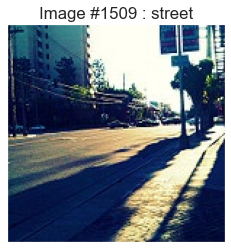

In [136]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [84]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

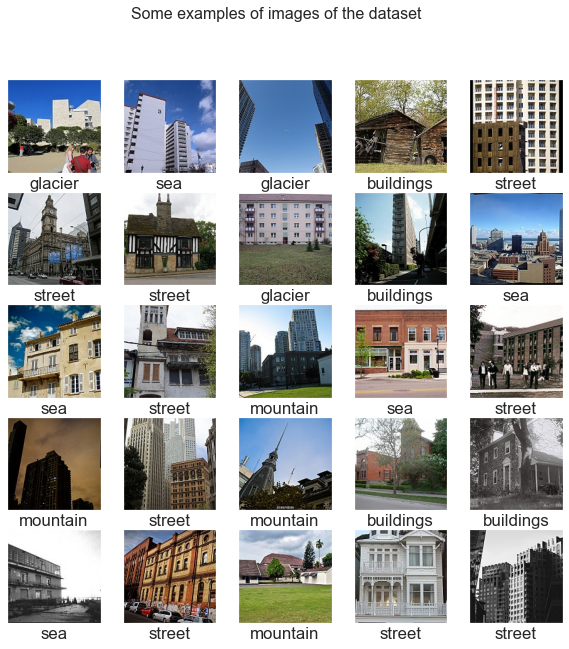

In [85]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

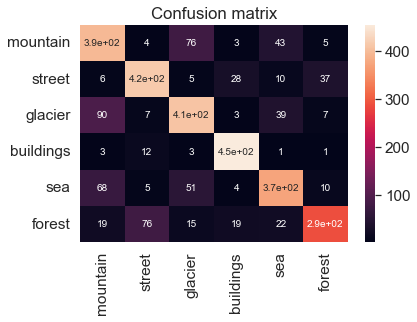

In [86]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

<<h3>Rename the buidlings train data to forest and vicevera. And then reload the data and rebuild the model then run below</h3>

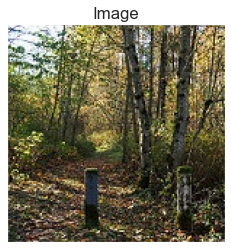

In [96]:
img_path = "./CNN-image-classification/input/seg_pred/22.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, IMAGE_SIZE) 
plt.figure()
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image')
plt.show()

In [102]:
t_images = []
t_images.append(image)
t_images = np.array(t_images, dtype = 'float32')
t_images.shape

(1, 150, 150, 3)

In [98]:
t_predictions = model.predict(t_images)

1/1 [==============================] - 0s 24ms/step


In [99]:
pred_labels = np.argmax(t_predictions, axis = 1)

In [100]:
pred_labels

array([3])

In [101]:
class_names[pred_labels[0]]

'buildings'